<a href="https://colab.research.google.com/github/Bharghavis/Voice-classification-using-ML/blob/main/SVM%2C_Decision_Tree%2C_CNN_on_TORONTO_dataset_VC_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount to google drive and Download the opensource dataset from kaggle**

In [ ]:
!pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Upload the kaggle.json file Downloaded from the kaggle account**

In [ ]:
from google.colab import files
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bharghavis123","key":"72728b87f39fe6224167b5c2770d0952"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 98% 419M/428M [00:04<00:00, 122MB/s]
100% 428M/428M [00:04<00:00, 91.5MB/s]


In [ ]:
!ls

drive  kaggle.json  sample_data  toronto  toronto-emotional-speech-set-tess.zip


In [ ]:
!mkdir toronto
!unzip toronto-emotional-speech-set-tess.zip -d toronto

mkdir: cannot create directory ‘toronto’: File exists
Archive:  toronto-emotional-speech-set-tess.zip
replace toronto/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Import the required libraries and packages**

In [ ]:
!pip install librosa
import librosa
from librosa import display
import os
import pandas as pd
import glob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dir_list = os.listdir('/content/toronto/TESS Toronto emotional speech set data')
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

**Upload the TESS dataset through the toronto directory created**

In [ ]:
import time
import numpy as np

path = '/content/toronto/TESS Toronto emotional speech set data/'
lst = []

start_time = time.time()  

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=200).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        #file = int(file[7:8]) 
        arr = mfccs
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 126.72135782241821 seconds ---


In [ ]:
print(lst)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Labelling the wav files and storing the numbers in list y : 0 = angry, 1 = disgust, 2 = fear, 3 = happy, 4 = neutral, 5 = surprise, 6 = sad**

In [ ]:
TESS= '/content/toronto/TESS Toronto emotional speech set data/'
path = []
emotion = []
y=[]

for i in dir_list:
    fname = os.listdir('/content/toronto/TESS Toronto emotional speech set data/' + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
            y.append(0)
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
            y.append(1)
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
            y.append(2)
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
            y.append(3)
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
            y.append(4)                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise') 
            y.append(5)              
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
            y.append(6)
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

In [ ]:
print(y)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
len(y)

2800

In [ ]:
len(lst)

2800

In [ ]:
lst =np.asarray(lst)
y=np.asarray(y)

# **DESICION TREE CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lst, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1876, 128), (924, 128), (1876,), (924,))

In [ ]:
X_train.astype, X_test.astype, y_train.astype, y_test.astype

(<function ndarray.astype>,
 <function ndarray.astype>,
 <function ndarray.astype>,
 <function ndarray.astype>)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.95      0.83      0.89       125
           2       0.87      0.87      0.87       130
           3       0.91      0.92      0.92       137
           4       0.91      0.91      0.91       139
           5       0.89      0.95      0.92       135
           6       0.87      0.91      0.89       130

    accuracy                           0.91       924
   macro avg       0.91      0.91      0.91       924
weighted avg       0.91      0.91      0.91       924



# **SVM Model**

In [ ]:
# Building the SVM model 
from sklearn.svm import SVC
svmclf = SVC() 
svmclf.fit(X_train, y_train) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test, y_pred_svmclf))) 

Accuracy : 0.8766233766233766


# **CNN Model**


In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
x_traincnn.shape, x_testcnn.shape, y_train.shape, y_test.shape

((1876, 128, 1), (924, 128, 1), (1876,), (924,))

In [ ]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(32, 5,padding='same',
                 input_shape=(128,1)))
#model.add(Conv1D(64, 5,padding='same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                

In [ ]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    name='Adadelta'
)

In [ ]:
model.compile(optimizer='adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnnhistory=model.fit(x_traincnn, y_train, batch_size=128, epochs=20, validation_data=(x_testcnn, y_test))

Train on 1876 samples, validate on 924 samples
Epoch 1/20
1876/1876 [==============================] - 1s 533us/step - loss: 19.9560 - accuracy: 0.1679 - val_loss: 2.2018 - val_accuracy: 0.3810
Epoch 2/20
1876/1876 [==============================] - 1s 269us/step - loss: 6.9978 - accuracy: 0.2356 - val_loss: 1.3852 - val_accuracy: 0.5790
Epoch 3/20
1876/1876 [==============================] - 1s 280us/step - loss: 3.4367 - accuracy: 0.2612 - val_loss: 1.7016 - val_accuracy: 0.3799
Epoch 4/20
1876/1876 [==============================] - 0s 232us/step - loss: 2.4079 - accuracy: 0.3028 - val_loss: 1.7080 - val_accuracy: 0.4091
Epoch 5/20
1876/1876 [==============================] - 0s 243us/step - loss: 1.9615 - accuracy: 0.3326 - val_loss: 1.5724 - val_accuracy: 0.4697
Epoch 6/20
1876/1876 [==============================] - 1s 276us/step - loss: 1.8641 - accuracy: 0.3353 - val_loss: 1.4960 - val_accuracy: 0.4719
Epoch 7/20
1876/1876 [==============================] - 0s 201us/step - loss

In [ ]:
score = model.evaluate(x_testcnn, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5582857064870529
Test accuracy: 0.8354978561401367


In [ ]:
predictions = model.predict_classes(x_testcnn)
predictions
y_test
new_Ytest = y_test.astype(int)
new_Ytest

array([3, 0, 3, 3, 2, 1, 4, 0, 4, 3, 5, 5, 3, 3, 3, 6, 0, 6, 5, 3, 4, 0,
       6, 4, 0, 6, 5, 1, 0, 4, 1, 6, 0, 0, 3, 6, 5, 1, 0, 6, 2, 0, 3, 5,
       6, 6, 0, 4, 4, 0, 1, 1, 1, 6, 3, 3, 2, 4, 2, 1, 3, 4, 6, 4, 5, 4,
       0, 1, 4, 3, 3, 6, 1, 5, 0, 6, 4, 6, 0, 2, 0, 2, 0, 4, 6, 1, 1, 5,
       6, 6, 5, 0, 3, 4, 0, 6, 1, 3, 3, 3, 3, 4, 5, 5, 4, 0, 4, 2, 0, 6,
       1, 1, 4, 2, 0, 6, 0, 2, 3, 6, 3, 6, 4, 0, 3, 4, 2, 4, 0, 5, 3, 6,
       5, 5, 5, 2, 3, 2, 3, 1, 2, 3, 4, 4, 2, 4, 4, 2, 1, 3, 6, 3, 4, 4,
       5, 5, 0, 0, 3, 1, 1, 6, 4, 5, 1, 1, 1, 0, 2, 5, 0, 1, 1, 6, 1, 3,
       4, 2, 5, 2, 1, 3, 2, 3, 4, 6, 6, 1, 4, 5, 6, 0, 5, 1, 6, 5, 4, 4,
       6, 5, 3, 3, 6, 6, 0, 6, 2, 6, 3, 4, 2, 0, 3, 4, 6, 2, 2, 0, 4, 4,
       6, 5, 2, 1, 3, 4, 0, 0, 3, 6, 4, 4, 2, 3, 2, 5, 6, 2, 3, 5, 4, 1,
       0, 2, 1, 0, 1, 1, 4, 4, 3, 3, 2, 2, 3, 5, 3, 0, 6, 1, 3, 4, 5, 0,
       0, 6, 5, 4, 3, 0, 3, 1, 4, 6, 0, 6, 2, 6, 1, 4, 4, 0, 4, 2, 2, 5,
       2, 2, 6, 4, 5, 5, 3, 4, 4, 1, 4, 4, 2, 1, 4,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       0.98      0.96      0.97       125
           2       1.00      0.16      0.28       130
           3       0.62      0.96      0.75       137
           4       0.74      0.99      0.85       139
           5       0.94      0.87      0.90       135
           6       0.90      0.90      0.90       130

    accuracy                           0.84       924
   macro avg       0.88      0.83      0.81       924
weighted avg       0.88      0.84      0.81       924



# **Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = angry, 1 = disgust, 2 = fear, 3 = happy, 4 = neutral, 5 = surprise, 6 = sad

[[128   0   0   0   0   0   0]
 [  0 120   0   3   0   1   1]
 [  0   0  21  63  34   0  12]
 [  0   0   0 131   0   6   0]
 [  0   0   0   0 138   1   0]
 [  0   3   0  14   1 117   0]
 [  0   0   0   0  13   0 117]]


**Save the model**

In [ ]:
model_name = 'SVM,Decision Tree,CNN on TORONTO dataset-VEC using ML.h5'
save_dir = '/content/drive/MyDrive/Colab Notebooks'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/Colab Notebooks/SVM,Decision Tree,CNN on TORONTO dataset-VEC using ML.h5 


In [ ]:
loaded_model =keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/SVM,Decision Tree,CNN on TORONTO dataset-VEC using ML.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                

In [ ]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

924/924 [==============================] - 0s 535us/sample - loss: 0.5583 - acc: 0.8355
Restored model, accuracy: 83.55%


# **Applying Autoencoder**

In [ ]:
!pip install pydub
from scipy.io import wavfile
import wave
import struct
from struct import *
import matplotlib.pyplot as plt
!pip install keras==2.1.5
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 334 kB 26.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
x_train= MinMaxScaler().fit_transform(lst)

In [ ]:
x_train.shape

(2800, 128)

In [ ]:
encoding_dim = 64
input_img = Input(shape=(128,))
encoded = Dense(encoding_dim, activation='relu')(input_img)


decoded = Dense(128, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


filepath="audio.compress-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='binary_crossentropy', verbose=1, save_best_only=False)
autoencoder.summary()
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_train, x_train),callbacks=[checkpoint],verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
Total params: 16,576
Trainable params: 16,576
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: saving model to audio.compress-0.7012.hdf5

Epoch 00002: saving model to audio.compress-0.6885.hdf5

Epoch 00003: saving model to audio.compress-0.6836.hdf5

Epoch 00004: saving model to audio.compress-0.6795.hdf5

Epoch 00005: saving model to audio.compress-0.6758.hdf5

Epoch 00006: saving model to audio.compress-0.6729.hdf5

Epoch 00007: saving model to audio.compres

**Test on any files under the toronto directory**

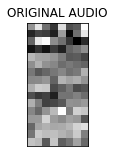

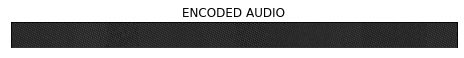

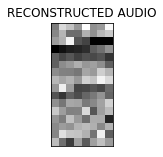

Accuracy= 0.9181050509214401 



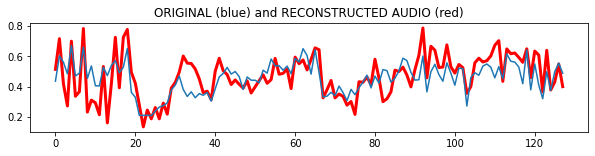

In [ ]:
filename = "audio.compress-0.6565.hdf5"
autoencoder.load_weights(filename)
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

n = 1  # how many files we will display
plt.figure(figsize=(10, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(16,8 ))
    plt.title("ORIGINAL AUDIO")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(8, .5))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs.reshape(1792,100).T)
    plt.title('ENCODED AUDIO')    
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(10, 5))
for i in range(n):
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(16,8 ))
    plt.title("RECONSTRUCTED AUDIO")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Accuracy=",1-np.mean(abs(x_train-decoded_imgs)),'\n')

plt.figure(figsize=(10, 2))
plt.plot(x_train[0],color='r',linewidth=3)
plt.plot(decoded_imgs[0])
plt.title('ORIGINAL (blue) and RECONSTRUCTED AUDIO (red)')
plt.show()

In [ ]:
decoded_imgs.shape

(2800, 128)

In [ ]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(decoded_imgs, y, test_size=0.33, random_state=42)

# **SVM Model**

In [ ]:
# Building the SVM model 
svmclf = SVC() 
svmclf.fit(X_train_encoded, y_train_encoded) 
  
# Storing the predictions of the non-linear model 
y_pred_svmclf = svmclf.predict(X_test_encoded) 
  
# Evaluating the performance of the non-linear model 
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_svmclf))) 

Accuracy : 0.9577922077922078


# **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train_encoded, y_train_encoded)

predictions = dtree.predict(X_test_encoded)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_encoded,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.89      0.94      0.91       125
           2       0.83      0.82      0.82       130
           3       0.84      0.85      0.84       137
           4       0.86      0.85      0.85       139
           5       0.89      0.87      0.88       135
           6       0.96      0.94      0.95       130

    accuracy                           0.89       924
   macro avg       0.89      0.89      0.89       924
weighted avg       0.89      0.89      0.89       924



# **CNN Model**

In [ ]:
x_traincnn_encoded = np.expand_dims(X_train_encoded, axis=2)
x_testcnn_encoded = np.expand_dims(X_test_encoded, axis=2)
x_traincnn_encoded.shape, x_testcnn_encoded.shape, y_train_encoded.shape, y_test_encoded.shape

((1876, 128, 1), (924, 128, 1), (1876,), (924,))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(32, 5,padding='same',
                 input_shape=(128,1)))
#model.add(Conv1D(64, 5,padding='same', activation='relu'))
#model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
#opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
cnnhistory_encoded=model.fit(x_traincnn_encoded, y_train_encoded, batch_size=128, epochs=70, validation_data=(x_testcnn_encoded, y_test_encoded))

Train on 1876 samples, validate on 924 samples
Epoch 1/70
1876/1876 [==============================] - 1s 416us/step - loss: 1.9588 - accuracy: 0.1594 - val_loss: 1.9133 - val_accuracy: 0.1851
Epoch 2/70
1876/1876 [==============================] - 0s 197us/step - loss: 1.9096 - accuracy: 0.2031 - val_loss: 1.8803 - val_accuracy: 0.1991
Epoch 3/70
1876/1876 [==============================] - 0s 199us/step - loss: 1.8754 - accuracy: 0.2441 - val_loss: 1.8100 - val_accuracy: 0.3593
Epoch 4/70
1876/1876 [==============================] - 0s 203us/step - loss: 1.8076 - accuracy: 0.2836 - val_loss: 1.7301 - val_accuracy: 0.2890
Epoch 5/70
1876/1876 [==============================] - 0s 183us/step - loss: 1.7319 - accuracy: 0.3076 - val_loss: 1.6511 - val_accuracy: 0.3842
Epoch 6/70
1876/1876 [==============================] - 0s 246us/step - loss: 1.6759 - accuracy: 0.3278 - val_loss: 1.5613 - val_accuracy: 0.3950
Epoch 7/70
1876/1876 [==============================] - 1s 286us/step - loss:

In [ ]:
score = model.evaluate(x_testcnn_encoded, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3114728992119496
Test accuracy: 0.9058441519737244


In [ ]:
predictions = model.predict_classes(x_testcnn_encoded)
predictions
y_test_encoded
new_Ytest_encoded = y_test_encoded.astype(int)
new_Ytest_encoded

array([3, 0, 3, 3, 2, 1, 4, 0, 4, 3, 5, 5, 3, 3, 3, 6, 0, 6, 5, 3, 4, 0,
       6, 4, 0, 6, 5, 1, 0, 4, 1, 6, 0, 0, 3, 6, 5, 1, 0, 6, 2, 0, 3, 5,
       6, 6, 0, 4, 4, 0, 1, 1, 1, 6, 3, 3, 2, 4, 2, 1, 3, 4, 6, 4, 5, 4,
       0, 1, 4, 3, 3, 6, 1, 5, 0, 6, 4, 6, 0, 2, 0, 2, 0, 4, 6, 1, 1, 5,
       6, 6, 5, 0, 3, 4, 0, 6, 1, 3, 3, 3, 3, 4, 5, 5, 4, 0, 4, 2, 0, 6,
       1, 1, 4, 2, 0, 6, 0, 2, 3, 6, 3, 6, 4, 0, 3, 4, 2, 4, 0, 5, 3, 6,
       5, 5, 5, 2, 3, 2, 3, 1, 2, 3, 4, 4, 2, 4, 4, 2, 1, 3, 6, 3, 4, 4,
       5, 5, 0, 0, 3, 1, 1, 6, 4, 5, 1, 1, 1, 0, 2, 5, 0, 1, 1, 6, 1, 3,
       4, 2, 5, 2, 1, 3, 2, 3, 4, 6, 6, 1, 4, 5, 6, 0, 5, 1, 6, 5, 4, 4,
       6, 5, 3, 3, 6, 6, 0, 6, 2, 6, 3, 4, 2, 0, 3, 4, 6, 2, 2, 0, 4, 4,
       6, 5, 2, 1, 3, 4, 0, 0, 3, 6, 4, 4, 2, 3, 2, 5, 6, 2, 3, 5, 4, 1,
       0, 2, 1, 0, 1, 1, 4, 4, 3, 3, 2, 2, 3, 5, 3, 0, 6, 1, 3, 4, 5, 0,
       0, 6, 5, 4, 3, 0, 3, 1, 4, 6, 0, 6, 2, 6, 1, 4, 4, 0, 4, 2, 2, 5,
       2, 2, 6, 4, 5, 5, 3, 4, 4, 1, 4, 4, 2, 1, 4,

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest_encoded, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.92      0.98      0.95       125
           2       0.78      0.93      0.85       130
           3       0.87      0.90      0.88       137
           4       0.87      0.87      0.87       139
           5       0.99      0.78      0.87       135
           6       0.97      0.90      0.94       130

    accuracy                           0.91       924
   macro avg       0.91      0.91      0.91       924
weighted avg       0.91      0.91      0.91       924



# **PLOTTING THE CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest_encoded, predictions)
print (matrix)

# 0 = angry, 1 = disgust, 2 = fear, 3 = happy, 4 = neutral, 5 = surprise, 6 = sad

[[127   0   0   0   0   0   1]
 [  0 123   0   1   0   1   0]
 [  0   0 121   4   4   0   1]
 [  0   1  13 123   0   0   0]
 [  0   1  15   1 121   0   1]
 [  0   9   0  13   8 105   0]
 [  0   0   7   0   6   0 117]]


# **SAVE THE MODEL**

In [ ]:
model_name = 'autoencoder.h5'
save_dir = '/content/drive/My Drive/Colab Notebooks'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/autoencoder.h5 


In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/autoencoder.h5')
loaded_model.summary()
loss, acc = loaded_model.evaluate(x_testcnn_encoded, y_test_encoded)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 128, 32)           192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                